# Separación de datos

Se van a partir los muestras en ventanas de periodos de dos años y la evaluación se harás sobre ventanas trimestrales. Parte de la literatura (buscar referencia) parten los conjuntos de datos en muestras de 2 años. 

En lo que tiene que ver con los datos de optimización se establecerá como convención para la nomenclatura de los archivos de datos como el año y trimestre inicial,guión, año y trimestre final, antecedidos por tres letras que abrevian la palabra optimización: "opt_aaaatmi-aaaatmf" 

Los archivos de pruebas, se nombraran como "pereval" seguido de un guión al piso, y luego el año y el trimestre del período evaluado

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
pd.options.display.max_columns = None
#pd.options.display.max_rows = None

In [3]:
df_1 = pd.read_parquet('sp500.parquet.gzip')

df_1.head(20)


,Date,Stock,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,MMM,148.050003,148.320007,145.399994,146.820007,128.033249,3277200.0
1,2016-01-05,MMM,146.820007,147.500000,145.610001,147.460007,128.591339,2688100.0
2,2016-01-06,MMM,145.589996,145.759995,143.419998,144.490005,126.001358,2997100.0
3,2016-01-07,MMM,142.520004,143.130005,140.630005,140.970001,122.931786,3553500.0
4,2016-01-08,MMM,141.360001,142.500000,140.220001,140.490005,122.513206,2664000.0
5,2016-01-11,MMM,140.970001,141.429993,139.410004,140.460007,122.487068,2775500.0
6,2016-01-12,MMM,141.360001,142.149994,139.130005,140.860001,122.835876,2363500.0
7,2016-01-13,MMM,140.889999,142.190002,138.539993,138.720001,120.969681,2598300.0
8,2016-01-14,MMM,139.740005,142.440002,138.860001,141.179993,123.114891,3720400.0
9,2016-01-15,MMM,138.300003,140.100006,137.210007,138.690002,120.943542,4683500.0


**- Análsis de cuales tienen todos los datos**

In [4]:
raw_1 = pd.DataFrame(df_1['Stock'].value_counts())
raw_1

,Stock
CAT,1218
NEM,1218
CAH,1218
HAL,1218
ODFL,1218
...,...
VIAC,217
OTIS,158
CARR,158
LUMN,61


**- Cargue del segundo archivo**

In [5]:
df_2 = pd.read_parquet('sp500_15.parquet.gzip')

df_2.head(20)

,Date,Stock,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,MMM,83.089996,83.449997,82.669998,83.019997,62.327927,3043700.0
1,2010-01-05,MMM,82.800003,83.230003,81.699997,82.500000,61.937550,2847000.0
2,2010-01-06,MMM,83.879997,84.599998,83.510002,83.669998,62.815929,5268500.0
3,2010-01-07,MMM,83.320000,83.760002,82.120003,83.730003,62.860950,4470100.0
4,2010-01-08,MMM,83.690002,84.320000,83.300003,84.320000,63.303928,3405800.0
5,2010-01-11,MMM,84.379997,84.599998,83.410004,83.980003,63.048668,2927100.0
6,2010-01-12,MMM,83.580002,84.180000,83.300003,84.050003,63.101208,3031800.0
7,2010-01-13,MMM,84.110001,84.110001,83.199997,83.779999,62.898499,3102000.0
8,2010-01-14,MMM,83.739998,83.930000,83.419998,83.500000,62.688309,2634100.0
9,2010-01-15,MMM,83.519997,84.089996,82.870003,83.370003,62.590675,3955000.0


In [6]:
df_2.shape

(706767, 8)

In [7]:
df_2_f = df_2[df_2['Date']>='2012-12-31'].copy().reset_index(drop=True)
df_2_f

,Date,Stock,Open,High,Low,Close,Adj Close,Volume
0,2012-12-31,MMM,91.550003,92.919998,91.400002,92.849998,75.328850,2580600.0
1,2013-01-02,MMM,94.190002,94.790001,93.959999,94.779999,76.894684,3206700.0
2,2013-01-03,MMM,94.339996,94.930000,94.129997,94.669998,76.805428,2704600.0
3,2013-01-04,MMM,94.790001,95.480003,94.540001,95.370003,77.373337,2704900.0
4,2013-01-07,MMM,95.019997,95.730003,94.760002,95.489998,77.470688,2745800.0
...,...,...,...,...,...,...,...,...
362722,2015-12-24,ZTS,47.860001,48.450001,47.630001,48.130001,46.542141,965300.0
362723,2015-12-28,ZTS,47.959999,48.200001,47.590000,47.900002,46.319740,928300.0
362724,2015-12-29,ZTS,48.369999,48.619999,47.959999,48.330002,46.735542,1483800.0
362725,2015-12-30,ZTS,48.330002,48.650002,48.009998,48.259998,46.667847,1453700.0


**- Análsis de cuales tienen todos los datos**

In [8]:
raw_2 = pd.DataFrame(df_2_f['Stock'].value_counts())
raw_2

,Stock
MOS,757
TROW,757
JKHY,757
HOLX,757
IVZ,757
...,...
WRK,133
UA,126
PYPL,126
KHC,126


In [9]:
raw_2.describe()

,Stock
count,490.000000
mean,740.259184
std,88.375293
min,52.000000
25%,757.000000
50%,757.000000
75%,757.000000
max,757.000000


**- Se unen las dos tablas para facilidad en el filtro**

In [10]:
df = pd.concat([df_2_f, df_1])
df

,Date,Stock,Open,High,Low,Close,Adj Close,Volume
0,2012-12-31,MMM,91.550003,92.919998,91.400002,92.849998,75.328850,2580600.0
1,2013-01-02,MMM,94.190002,94.790001,93.959999,94.779999,76.894684,3206700.0
2,2013-01-03,MMM,94.339996,94.930000,94.129997,94.669998,76.805428,2704600.0
3,2013-01-04,MMM,94.790001,95.480003,94.540001,95.370003,77.373337,2704900.0
4,2013-01-07,MMM,95.019997,95.730003,94.760002,95.489998,77.470688,2745800.0
...,...,...,...,...,...,...,...,...
600984,2020-10-26,ZTS,162.000000,162.949997,158.960007,160.479996,160.479996,1151600.0
600985,2020-10-27,ZTS,160.839996,164.479996,160.630005,162.470001,162.470001,1851000.0
600986,2020-10-28,ZTS,159.759995,161.509995,158.160004,158.690002,158.690002,2160700.0
600987,2020-10-29,ZTS,159.460007,162.449997,158.130005,161.190002,161.190002,1539000.0


**- Análsis de cuales tienen todos los datos**

In [11]:
raw = pd.DataFrame(df['Stock'].value_counts())
raw

,Stock
MOS,1975
HAL,1975
CAH,1975
CAT,1975
ODFL,1975
...,...
VIAC,217
CARR,158
OTIS,158
LUMN,61


In [12]:
raw.describe()

,Stock
count,503.000000
mean,1915.936382
std,267.078081
min,16.000000
25%,1974.000000
50%,1974.000000
75%,1974.000000
max,1975.000000


In [13]:
raw.reset_index(inplace=True)

In [14]:
seleccionados = raw[raw['Stock']>=1974]
seleccionados.describe()

,Stock
count,465.000000
mean,1974.017204
std,0.130172
min,1974.000000
25%,1974.000000
50%,1974.000000
75%,1974.000000
max,1975.000000


In [15]:
seleccionados.reset_index(inplace=True)

In [16]:
lista = seleccionados['index'].to_list()
lista

['MOS',
 'HAL',
 'CAH',
 'CAT',
 'ODFL',
 'NEM',
 'GPS',
 'AMAT',
 'WELL',
 'SYY',
 'MAS',
 'LKQ',
 'INCY',
 'GOOGL',
 'ED',
 'TGT',
 'MTD',
 'WMB',
 'F',
 'WM',
 'ZBH',
 'LHX',
 'SNPS',
 'DVN',
 'USB',
 'FANG',
 'GRMN',
 'CINF',
 'VFC',
 'BWA',
 'EXR',
 'CHD',
 'NOW',
 'MLM',
 'CL',
 'HRL',
 'MCK',
 'HCA',
 'WYNN',
 'OMC',
 'EQIX',
 'TFX',
 'ABMD',
 'BEN',
 'CCI',
 'TMO',
 'DFS',
 'DISCK',
 'NKE',
 'WFC',
 'ILMN',
 'HAS',
 'SLB',
 'ZBRA',
 'IT',
 'DXC',
 'NRG',
 'DLTR',
 'J',
 'PVH',
 'K',
 'FBHS',
 'LH',
 'AEE',
 'AJG',
 'AMD',
 'PRGO',
 'SYK',
 'STX',
 'ECL',
 'JNPR',
 'KMX',
 'TEL',
 'PRU',
 'MO',
 'FTI',
 'FLIR',
 'EFX',
 'FISV',
 'LNC',
 'EBAY',
 'ABT',
 'DRI',
 'FE',
 'MA',
 'HBAN',
 'RE',
 'SWKS',
 'JBHT',
 'PPL',
 'STE',
 'CHTR',
 'IPGP',
 'EOG',
 'CAG',
 'KMB',
 'IP',
 'XOM',
 'FIS',
 'DIS',
 'AMCR',
 'XEL',
 'BIO',
 'COST',
 'OKE',
 'LVS',
 'HBI',
 'DD',
 'PKG',
 'XYL',
 'ROST',
 'SCHW',
 'TXT',
 'CI',
 'IFF',
 'GILD',
 'BXP',
 'HON',
 'MRK',
 'CMA',
 'SPG',
 'GS',
 'UNH',
 

In [17]:
df_filt = df[df['Stock'].isin(lista)].copy()
df_filt.reset_index(inplace=True, drop=True)


In [18]:
df_filt

,Date,Stock,Open,High,Low,Close,Adj Close,Volume
0,2012-12-31,MMM,91.550003,92.919998,91.400002,92.849998,75.328850,2580600.0
1,2013-01-02,MMM,94.190002,94.790001,93.959999,94.779999,76.894684,3206700.0
2,2013-01-03,MMM,94.339996,94.930000,94.129997,94.669998,76.805428,2704600.0
3,2013-01-04,MMM,94.790001,95.480003,94.540001,95.370003,77.373337,2704900.0
4,2013-01-07,MMM,95.019997,95.730003,94.760002,95.489998,77.470688,2745800.0
...,...,...,...,...,...,...,...,...
917913,2020-10-26,ZION,32.889999,32.889999,32.000000,32.459999,32.459999,2216400.0
917914,2020-10-27,ZION,32.119999,32.630001,31.080000,31.080000,31.080000,1786100.0
917915,2020-10-28,ZION,30.290001,31.139999,30.270000,30.600000,30.600000,1982000.0
917916,2020-10-29,ZION,30.340000,31.719999,29.830000,31.559999,31.559999,1885900.0


In [19]:
df_filt['Stock'].value_counts()

MOS     1975
GPS     1975
CAH     1975
AMAT    1975
ODFL    1975
        ... 
AVY     1974
PEAK    1974
YUM     1974
CTXS    1974
SRE     1974
Name: Stock, Length: 465, dtype: int64

In [20]:
pd.DataFrame(df_filt['Stock'].value_counts()).describe()

,Stock
count,465.000000
mean,1974.017204
std,0.130172
min,1974.000000
25%,1974.000000
50%,1974.000000
75%,1974.000000
max,1975.000000


**- Creación de los datos para procesar**

In [21]:
df_filt.sort_values(['Stock', 'Date'], ascending=[True, True], inplace=True)
df_filt.reset_index(inplace=True, drop=True)

In [22]:
df_filt

,Date,Stock,Open,High,Low,Close,Adj Close,Volume
0,2012-12-31,A,28.390558,29.306152,28.354792,29.284693,27.186447,4707900.0
1,2013-01-02,A,30.164520,30.164520,29.434908,29.957081,27.810661,8790200.0
2,2013-01-03,A,30.000000,30.143061,29.742489,30.064377,27.910267,5751700.0
3,2013-01-04,A,30.143061,30.722460,29.942776,30.658083,28.461437,6432800.0
4,2013-01-07,A,30.472103,30.615164,30.314735,30.436338,28.255585,3589500.0
...,...,...,...,...,...,...,...,...
917913,2020-10-26,ZION,32.889999,32.889999,32.000000,32.459999,32.459999,2216400.0
917914,2020-10-27,ZION,32.119999,32.630001,31.080000,31.080000,31.080000,1786100.0
917915,2020-10-28,ZION,30.290001,31.139999,30.270000,30.600000,30.600000,1982000.0
917916,2020-10-29,ZION,30.340000,31.719999,29.830000,31.559999,31.559999,1885900.0


In [23]:
df_prosc = df_filt[['Date','Stock','Adj Close']].copy()
df_prosc

,Date,Stock,Adj Close
0,2012-12-31,A,27.186447
1,2013-01-02,A,27.810661
2,2013-01-03,A,27.910267
3,2013-01-04,A,28.461437
4,2013-01-07,A,28.255585
...,...,...,...
917913,2020-10-26,ZION,32.459999
917914,2020-10-27,ZION,31.080000
917915,2020-10-28,ZION,30.600000
917916,2020-10-29,ZION,31.559999


In [24]:
df_prosc['Stock'][df_prosc["Date"]=='2012-12-31'].count()

465

- Hay 465 acciones con el primer valor de la serie

In [25]:
df_prosc['Stock'][df_prosc["Date"]=='2013-01-02'].count()

465

In [26]:
df_prosc['Stock'][df_prosc["Date"]=='2020-10-29'].count()

465

In [27]:
df_prosc['Stock'][df_prosc["Date"]=='2020-10-30'].count()

465

- Hay algo que no cuadra, pues hay 465 acciones en los tres rango y no coincide con las desigualdades mostradas cuando se describieron los objetos

In [28]:
df_pivot = df_prosc.pivot(index='Date', columns='Stock', values='Adj Close')
df_pivot

Stock,A,AAL,AAP,AAPL,ABC,ABMD,ABT,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIV,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALL,ALXN,AMAT,AMCR,AMD,AME,AMGN,AMP,AMT,AMZN,ANSS,ANTM,AON,AOS,APA,APD,APH,APTV,ARE,ATO,ATVI,AVB,AVGO,AVY,AWK,AXP,AZO,BA,BAC,BAX,BBY,BDX,BEN,BIIB,BIO,BK,BKNG,BKR,BLK,BLL,BMY,BR,BSX,BWA,BXP,C,CAG,CAH,CAT,CB,CBOE,CBRE,CCI,CCL,CDNS,CE,CERN,CF,CHD,CHRW,CHTR,CI,CINF,CL,CLX,CMA,CMCSA,CME,CMG,CMI,CMS,CNC,CNP,COF,COG,COO,COP,COST,CPB,CPRT,CRM,CSCO,CSX,CTAS,CTSH,CTXS,CVS,CVX,CXO,D,DAL,DD,DE,DFS,DG,DGX,DHI,DHR,DIS,DISCA,DISCK,DISH,DLR,DLTR,DOV,DPZ,DRE,DRI,DTE,DUK,DVA,DVN,DXC,DXCM,EA,EBAY,ECL,ED,EFX,EIX,EL,EMN,EMR,EOG,EQIX,EQR,ES,ESS,ETN,ETR,EVRG,EW,EXC,EXPD,EXPE,EXR,F,FANG,FAST,FB,FBHS,FCX,FDX,FE,FFIV,FIS,FISV,FITB,FLIR,FLS,FLT,FMC,FRC,FRT,FTI,FTNT,GD,GE,GILD,GIS,GL,GLW,GM,GOOG,GOOGL,GPC,GPN,GPS,GRMN,GS,GWW,HAL,HAS,HBAN,HBI,HCA,HD,HES,HFC,HIG,HII,HOLX,HON,HPQ,HRL,HSIC,HST,HSY,HUM,IBM,ICE,IDXX,IEX,IFF,ILMN,INCY,INTC,INTU,IP,IPG,IPGP,IRM,ISRG,IT,ITW,IVZ,J,JBHT,JCI,JKHY,JNJ,JNPR,JPM,K,KEY,KIM,KLAC,KMB,KMI,KMX,KO,KR,KSU,L,LB,LDOS,LEG,LEN,LH,LHX,LIN,LKQ,LLY,LMT,LNC,LNT,LOW,LRCX,LUV,LVS,LYB,LYV,MA,MAA,MAR,MAS,MCD,MCHP,MCK,MCO,MDLZ,MDT,MET,MGM,MHK,MKC,MKTX,MLM,MMC,MMM,MNST,MO,MOS,MPC,MRK,MRO,MS,MSCI,MSFT,MSI,MTB,MTD,MU,MXIM,MYL,NDAQ,NEE,NEM,NFLX,NI,NKE,NLSN,NOC,NOV,NOW,NRG,NSC,NTAP,NTRS,NUE,NVDA,NVR,NWL,O,ODFL,OKE,OMC,ORCL,ORLY,OXY,PAYX,PBCT,PCAR,PEAK,PEG,PEP,PFE,PFG,PG,PGR,PH,PHM,PKG,PKI,PLD,PM,PNC,PNR,PNW,POOL,PPG,PPL,PRGO,PRU,PSA,PSX,PVH,PWR,PXD,QCOM,RCL,RE,REG,REGN,RF,RHI,RJF,RL,RMD,ROK,ROL,ROP,ROST,RSG,RTX,SBAC,SBUX,SCHW,SEE,SHW,SIVB,SJM,SLB,SLG,SNA,SNPS,SO,SPG,SPGI,SRE,STE,STT,STX,STZ,SWK,SWKS,SYK,SYY,T,TAP,TDG,TDY,TEL,TER,TFC,TFX,TGT,TIF,TJX,TMO,TMUS,TPR,TROW,TRV,TSCO,TSN,TT,TTWO,TXN,TXT,TYL,UAA,UAL,UDR,UHS,ULTA,UNH,UNM,UNP,UPS,URI,USB,V,VAR,VFC,VLO,VMC,VNO,VRSK,VRSN,VRTX,VTR,VZ,WAB,WAT,WBA,WDC,WEC,WELL,WFC,WHR,WLTW,WM,WMB,WMT,WRB,WST,WU,WY,WYNN,XEL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-12-31,27.186447,12.727010,70.858101,16.406870,37.960087,13.440000,26.850609,56.222237,37.680000,34.751362,22.010273,41.775543,35.349998,23.491665,31.994425,8.245103,21.897707,30.222961,14.982390,29.528336,27.861467,40.910000,54.537655,27.750000,19.213507,34.579418,93.739998,9.960887,6.377608,2.400000,35.685547,70.769402,51.228458,67.046280,250.869995,67.339996,54.033730,50.844997,14.122932,67.298996,62.958862,30.090767,28.744768,54.004494,28.621927,9.934611,105.422691,25.819450,29.374022,31.308113,51.027992,354.429993,62.666809,10.353436,31.835129,9.425895,69.172867,32.171432,146.369995,105.050003,21.746775,620.390015,24.193554,168.594559,20.905170,25.953382,19.581730,5.730000,32.312183,80.711563,35.166279,18.563438,32.801579,69.595726,62.664017,26.315010,19.900000,56.751461,29.533539,13.510000,38.309361,38.152657,31.993345,23.660326,52.347725,76.239998,53.313522,30.518351,43.517513,58.977520,24.898058,16.172739,36.900471,297.459991,87.873573,18.999756,10.250000,13.961074,49.607452,23.234308,92.233849,44.910416,84.430199,27.750456,14.750000,42.025002,15.384358,17.055679,36.821575,35.392105,50.943409,40.196308,77.971184,78.918793,37.850861,10.543489,34.710529,72.377419,32.840641,41.353718,49.032307,18.162479,27.702530,45.263737,32.437405,29.250000,36.400002,48.283173,40.560001,37.410706,40.091751,10.221820,31.087156,45.175632,44.636608,55.264999,44.824818,13.019778,13.590000,14.520000,20.910742,65.810364,40.839855,49.178200,34.944885,54.613010,55.689571,40.989777,55.631809,169.317947,37.568176,30.490141,115.988708,25.160753,44.946144,21.891232,15.028334,21.842064,35.551311,57.347

In [29]:
df_pivot.isnull().values.any()
#df.isnull().values.any()

True

In [30]:
df_pivot.isnull().sum().count()

465

In [31]:
df_pivot.isnull().any(axis=1)

Date
2012-12-31    False
2013-01-02    False
2013-01-03    False
2013-01-04    False
2013-01-07    False
              ...  
2020-10-26    False
2020-10-27    False
2020-10-28    False
2020-10-29    False
2020-10-30    False
Length: 1979, dtype: bool

In [32]:
pd.isnull(df_pivot).any(1)

Date
2012-12-31    False
2013-01-02    False
2013-01-03    False
2013-01-04    False
2013-01-07    False
              ...  
2020-10-26    False
2020-10-27    False
2020-10-28    False
2020-10-29    False
2020-10-30    False
Length: 1979, dtype: bool

In [33]:
is_NaN = df_pivot.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df_pivot[row_has_NaN]

In [34]:
rows_with_NaN

Stock,A,AAL,AAP,AAPL,ABC,ABMD,ABT,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIV,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALL,ALXN,AMAT,AMCR,AMD,AME,AMGN,AMP,AMT,AMZN,ANSS,ANTM,AON,AOS,APA,APD,APH,APTV,ARE,ATO,ATVI,AVB,AVGO,AVY,AWK,AXP,AZO,BA,BAC,BAX,BBY,BDX,BEN,BIIB,BIO,BK,BKNG,BKR,BLK,BLL,BMY,BR,BSX,BWA,BXP,C,CAG,CAH,CAT,CB,CBOE,CBRE,CCI,CCL,CDNS,CE,CERN,CF,CHD,CHRW,CHTR,CI,CINF,CL,CLX,CMA,CMCSA,CME,CMG,CMI,CMS,CNC,CNP,COF,COG,COO,COP,COST,CPB,CPRT,CRM,CSCO,CSX,CTAS,CTSH,CTXS,CVS,CVX,CXO,D,DAL,DD,DE,DFS,DG,DGX,DHI,DHR,DIS,DISCA,DISCK,DISH,DLR,DLTR,DOV,DPZ,DRE,DRI,DTE,DUK,DVA,DVN,DXC,DXCM,EA,EBAY,ECL,ED,EFX,EIX,EL,EMN,EMR,EOG,EQIX,EQR,ES,ESS,ETN,ETR,EVRG,EW,EXC,EXPD,EXPE,EXR,F,FANG,FAST,FB,FBHS,FCX,FDX,FE,FFIV,FIS,FISV,FITB,FLIR,FLS,FLT,FMC,FRC,FRT,FTI,FTNT,GD,GE,GILD,GIS,GL,GLW,GM,GOOG,GOOGL,GPC,GPN,GPS,GRMN,GS,GWW,HAL,HAS,HBAN,HBI,HCA,HD,HES,HFC,HIG,HII,HOLX,HON,HPQ,HRL,HSIC,HST,HSY,HUM,IBM,ICE,IDXX,IEX,IFF,ILMN,INCY,INTC,INTU,IP,IPG,IPGP,IRM,ISRG,IT,ITW,IVZ,J,JBHT,JCI,JKHY,JNJ,JNPR,JPM,K,KEY,KIM,KLAC,KMB,KMI,KMX,KO,KR,KSU,L,LB,LDOS,LEG,LEN,LH,LHX,LIN,LKQ,LLY,LMT,LNC,LNT,LOW,LRCX,LUV,LVS,LYB,LYV,MA,MAA,MAR,MAS,MCD,MCHP,MCK,MCO,MDLZ,MDT,MET,MGM,MHK,MKC,MKTX,MLM,MMC,MMM,MNST,MO,MOS,MPC,MRK,MRO,MS,MSCI,MSFT,MSI,MTB,MTD,MU,MXIM,MYL,NDAQ,NEE,NEM,NFLX,NI,NKE,NLSN,NOC,NOV,NOW,NRG,NSC,NTAP,NTRS,NUE,NVDA,NVR,NWL,O,ODFL,OKE,OMC,ORCL,ORLY,OXY,PAYX,PBCT,PCAR,PEAK,PEG,PEP,PFE,PFG,PG,PGR,PH,PHM,PKG,PKI,PLD,PM,PNC,PNR,PNW,POOL,PPG,PPL,PRGO,PRU,PSA,PSX,PVH,PWR,PXD,QCOM,RCL,RE,REG,REGN,RF,RHI,RJF,RL,RMD,ROK,ROL,ROP,ROST,RSG,RTX,SBAC,SBUX,SCHW,SEE,SHW,SIVB,SJM,SLB,SLG,SNA,SNPS,SO,SPG,SPGI,SRE,STE,STT,STX,STZ,SWK,SWKS,SYK,SYY,T,TAP,TDG,TDY,TEL,TER,TFC,TFX,TGT,TIF,TJX,TMO,TMUS,TPR,TROW,TRV,TSCO,TSN,TT,TTWO,TXN,TXT,TYL,UAA,UAL,UDR,UHS,ULTA,UNH,UNM,UNP,UPS,URI,USB,V,VAR,VFC,VLO,VMC,VNO,VRSK,VRSN,VRTX,VTR,VZ,WAB,WAT,WBA,WDC,WEC,WELL,WFC,WHR,WLTW,WM,WMB,WMT,WRB,WST,WU,WY,WYNN,XEL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

- se eliminan todos los renglones con problemas de NaN

In [35]:
df = df_pivot.dropna(axis='rows').copy()
df

Stock,A,AAL,AAP,AAPL,ABC,ABMD,ABT,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIV,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALL,ALXN,AMAT,AMCR,AMD,AME,AMGN,AMP,AMT,AMZN,ANSS,ANTM,AON,AOS,APA,APD,APH,APTV,ARE,ATO,ATVI,AVB,AVGO,AVY,AWK,AXP,AZO,BA,BAC,BAX,BBY,BDX,BEN,BIIB,BIO,BK,BKNG,BKR,BLK,BLL,BMY,BR,BSX,BWA,BXP,C,CAG,CAH,CAT,CB,CBOE,CBRE,CCI,CCL,CDNS,CE,CERN,CF,CHD,CHRW,CHTR,CI,CINF,CL,CLX,CMA,CMCSA,CME,CMG,CMI,CMS,CNC,CNP,COF,COG,COO,COP,COST,CPB,CPRT,CRM,CSCO,CSX,CTAS,CTSH,CTXS,CVS,CVX,CXO,D,DAL,DD,DE,DFS,DG,DGX,DHI,DHR,DIS,DISCA,DISCK,DISH,DLR,DLTR,DOV,DPZ,DRE,DRI,DTE,DUK,DVA,DVN,DXC,DXCM,EA,EBAY,ECL,ED,EFX,EIX,EL,EMN,EMR,EOG,EQIX,EQR,ES,ESS,ETN,ETR,EVRG,EW,EXC,EXPD,EXPE,EXR,F,FANG,FAST,FB,FBHS,FCX,FDX,FE,FFIV,FIS,FISV,FITB,FLIR,FLS,FLT,FMC,FRC,FRT,FTI,FTNT,GD,GE,GILD,GIS,GL,GLW,GM,GOOG,GOOGL,GPC,GPN,GPS,GRMN,GS,GWW,HAL,HAS,HBAN,HBI,HCA,HD,HES,HFC,HIG,HII,HOLX,HON,HPQ,HRL,HSIC,HST,HSY,HUM,IBM,ICE,IDXX,IEX,IFF,ILMN,INCY,INTC,INTU,IP,IPG,IPGP,IRM,ISRG,IT,ITW,IVZ,J,JBHT,JCI,JKHY,JNJ,JNPR,JPM,K,KEY,KIM,KLAC,KMB,KMI,KMX,KO,KR,KSU,L,LB,LDOS,LEG,LEN,LH,LHX,LIN,LKQ,LLY,LMT,LNC,LNT,LOW,LRCX,LUV,LVS,LYB,LYV,MA,MAA,MAR,MAS,MCD,MCHP,MCK,MCO,MDLZ,MDT,MET,MGM,MHK,MKC,MKTX,MLM,MMC,MMM,MNST,MO,MOS,MPC,MRK,MRO,MS,MSCI,MSFT,MSI,MTB,MTD,MU,MXIM,MYL,NDAQ,NEE,NEM,NFLX,NI,NKE,NLSN,NOC,NOV,NOW,NRG,NSC,NTAP,NTRS,NUE,NVDA,NVR,NWL,O,ODFL,OKE,OMC,ORCL,ORLY,OXY,PAYX,PBCT,PCAR,PEAK,PEG,PEP,PFE,PFG,PG,PGR,PH,PHM,PKG,PKI,PLD,PM,PNC,PNR,PNW,POOL,PPG,PPL,PRGO,PRU,PSA,PSX,PVH,PWR,PXD,QCOM,RCL,RE,REG,REGN,RF,RHI,RJF,RL,RMD,ROK,ROL,ROP,ROST,RSG,RTX,SBAC,SBUX,SCHW,SEE,SHW,SIVB,SJM,SLB,SLG,SNA,SNPS,SO,SPG,SPGI,SRE,STE,STT,STX,STZ,SWK,SWKS,SYK,SYY,T,TAP,TDG,TDY,TEL,TER,TFC,TFX,TGT,TIF,TJX,TMO,TMUS,TPR,TROW,TRV,TSCO,TSN,TT,TTWO,TXN,TXT,TYL,UAA,UAL,UDR,UHS,ULTA,UNH,UNM,UNP,UPS,URI,USB,V,VAR,VFC,VLO,VMC,VNO,VRSK,VRSN,VRTX,VTR,VZ,WAB,WAT,WBA,WDC,WEC,WELL,WFC,WHR,WLTW,WM,WMB,WMT,WRB,WST,WU,WY,WYNN,XEL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-12-31,27.186447,12.727010,70.858101,16.406870,37.960087,13.440000,26.850609,56.222237,37.680000,34.751362,22.010273,41.775543,35.349998,23.491665,31.994425,8.245103,21.897707,30.222961,14.982390,29.528336,27.861467,40.910000,54.537655,27.750000,19.213507,34.579418,93.739998,9.960887,6.377608,2.400000,35.685547,70.769402,51.228458,67.046280,250.869995,67.339996,54.033730,50.844997,14.122932,67.298996,62.958862,30.090767,28.744768,54.004494,28.621927,9.934611,105.422691,25.819450,29.374022,31.308113,51.027992,354.429993,62.666809,10.353436,31.835129,9.425895,69.172867,32.171432,146.369995,105.050003,21.746775,620.390015,24.193554,168.594559,20.905170,25.953382,19.581730,5.730000,32.312183,80.711563,35.166279,18.563438,32.801579,69.595726,62.664017,26.315010,19.900000,56.751461,29.533539,13.510000,38.309361,38.152657,31.993345,23.660326,52.347725,76.239998,53.313522,30.518351,43.517513,58.977520,24.898058,16.172739,36.900471,297.459991,87.873573,18.999756,10.250000,13.961074,49.607452,23.234308,92.233849,44.910416,84.430199,27.750456,14.750000,42.025002,15.384358,17.055679,36.821575,35.392105,50.943409,40.196308,77.971184,78.918793,37.850861,10.543489,34.710529,72.377419,32.840641,41.353718,49.032307,18.162479,27.702530,45.263737,32.437405,29.250000,36.400002,48.283173,40.560001,37.410706,40.091751,10.221820,31.087156,45.175632,44.636608,55.264999,44.824818,13.019778,13.590000,14.520000,20.910742,65.810364,40.839855,49.178200,34.944885,54.613010,55.689571,40.989777,55.631809,169.317947,37.568176,30.490141,115.988708,25.160753,44.946144,21.891232,15.028334,21.842064,35.551311,57.347

In [36]:
# Sanity check
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]

In [37]:
rows_with_NaN

Stock,A,AAL,AAP,AAPL,ABC,ABMD,ABT,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIV,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALL,ALXN,AMAT,AMCR,AMD,AME,AMGN,AMP,AMT,AMZN,ANSS,ANTM,AON,AOS,APA,APD,APH,APTV,ARE,ATO,ATVI,AVB,AVGO,AVY,AWK,AXP,AZO,BA,BAC,BAX,BBY,BDX,BEN,BIIB,BIO,BK,BKNG,BKR,BLK,BLL,BMY,BR,BSX,BWA,BXP,C,CAG,CAH,CAT,CB,CBOE,CBRE,CCI,CCL,CDNS,CE,CERN,CF,CHD,CHRW,CHTR,CI,CINF,CL,CLX,CMA,CMCSA,CME,CMG,CMI,CMS,CNC,CNP,COF,COG,COO,COP,COST,CPB,CPRT,CRM,CSCO,CSX,CTAS,CTSH,CTXS,CVS,CVX,CXO,D,DAL,DD,DE,DFS,DG,DGX,DHI,DHR,DIS,DISCA,DISCK,DISH,DLR,DLTR,DOV,DPZ,DRE,DRI,DTE,DUK,DVA,DVN,DXC,DXCM,EA,EBAY,ECL,ED,EFX,EIX,EL,EMN,EMR,EOG,EQIX,EQR,ES,ESS,ETN,ETR,EVRG,EW,EXC,EXPD,EXPE,EXR,F,FANG,FAST,FB,FBHS,FCX,FDX,FE,FFIV,FIS,FISV,FITB,FLIR,FLS,FLT,FMC,FRC,FRT,FTI,FTNT,GD,GE,GILD,GIS,GL,GLW,GM,GOOG,GOOGL,GPC,GPN,GPS,GRMN,GS,GWW,HAL,HAS,HBAN,HBI,HCA,HD,HES,HFC,HIG,HII,HOLX,HON,HPQ,HRL,HSIC,HST,HSY,HUM,IBM,ICE,IDXX,IEX,IFF,ILMN,INCY,INTC,INTU,IP,IPG,IPGP,IRM,ISRG,IT,ITW,IVZ,J,JBHT,JCI,JKHY,JNJ,JNPR,JPM,K,KEY,KIM,KLAC,KMB,KMI,KMX,KO,KR,KSU,L,LB,LDOS,LEG,LEN,LH,LHX,LIN,LKQ,LLY,LMT,LNC,LNT,LOW,LRCX,LUV,LVS,LYB,LYV,MA,MAA,MAR,MAS,MCD,MCHP,MCK,MCO,MDLZ,MDT,MET,MGM,MHK,MKC,MKTX,MLM,MMC,MMM,MNST,MO,MOS,MPC,MRK,MRO,MS,MSCI,MSFT,MSI,MTB,MTD,MU,MXIM,MYL,NDAQ,NEE,NEM,NFLX,NI,NKE,NLSN,NOC,NOV,NOW,NRG,NSC,NTAP,NTRS,NUE,NVDA,NVR,NWL,O,ODFL,OKE,OMC,ORCL,ORLY,OXY,PAYX,PBCT,PCAR,PEAK,PEG,PEP,PFE,PFG,PG,PGR,PH,PHM,PKG,PKI,PLD,PM,PNC,PNR,PNW,POOL,PPG,PPL,PRGO,PRU,PSA,PSX,PVH,PWR,PXD,QCOM,RCL,RE,REG,REGN,RF,RHI,RJF,RL,RMD,ROK,ROL,ROP,ROST,RSG,RTX,SBAC,SBUX,SCHW,SEE,SHW,SIVB,SJM,SLB,SLG,SNA,SNPS,SO,SPG,SPGI,SRE,STE,STT,STX,STZ,SWK,SWKS,SYK,SYY,T,TAP,TDG,TDY,TEL,TER,TFC,TFX,TGT,TIF,TJX,TMO,TMUS,TPR,TROW,TRV,TSCO,TSN,TT,TTWO,TXN,TXT,TYL,UAA,UAL,UDR,UHS,ULTA,UNH,UNM,UNP,UPS,URI,USB,V,VAR,VFC,VLO,VMC,VNO,VRSK,VRSN,VRTX,VTR,VZ,WAB,WAT,WBA,WDC,WEC,WELL,WFC,WHR,WLTW,WM,WMB,WMT,WRB,WST,WU,WY,WYNN,XEL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [38]:
df_pct = df.pct_change()
df_pct.dropna(axis='rows', inplace=True)
df_pct

Stock,A,AAL,AAP,AAPL,ABC,ABMD,ABT,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIV,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALL,ALXN,AMAT,AMCR,AMD,AME,AMGN,AMP,AMT,AMZN,ANSS,ANTM,AON,AOS,APA,APD,APH,APTV,ARE,ATO,ATVI,AVB,AVGO,AVY,AWK,AXP,AZO,BA,BAC,BAX,BBY,BDX,BEN,BIIB,BIO,BK,BKNG,BKR,BLK,BLL,BMY,BR,BSX,BWA,BXP,C,CAG,CAH,CAT,CB,CBOE,CBRE,CCI,CCL,CDNS,CE,CERN,CF,CHD,CHRW,CHTR,CI,CINF,CL,CLX,CMA,CMCSA,CME,CMG,CMI,CMS,CNC,CNP,COF,COG,COO,COP,COST,CPB,CPRT,CRM,CSCO,CSX,CTAS,CTSH,CTXS,CVS,CVX,CXO,D,DAL,DD,DE,DFS,DG,DGX,DHI,DHR,DIS,DISCA,DISCK,DISH,DLR,DLTR,DOV,DPZ,DRE,DRI,DTE,DUK,DVA,DVN,DXC,DXCM,EA,EBAY,ECL,ED,EFX,EIX,EL,EMN,EMR,EOG,EQIX,EQR,ES,ESS,ETN,ETR,EVRG,EW,EXC,EXPD,EXPE,EXR,F,FANG,FAST,FB,FBHS,FCX,FDX,FE,FFIV,FIS,FISV,FITB,FLIR,FLS,FLT,FMC,FRC,FRT,FTI,FTNT,GD,GE,GILD,GIS,GL,GLW,GM,GOOG,GOOGL,GPC,GPN,GPS,GRMN,GS,GWW,HAL,HAS,HBAN,HBI,HCA,HD,HES,HFC,HIG,HII,HOLX,HON,HPQ,HRL,HSIC,HST,HSY,HUM,IBM,ICE,IDXX,IEX,IFF,ILMN,INCY,INTC,INTU,IP,IPG,IPGP,IRM,ISRG,IT,ITW,IVZ,J,JBHT,JCI,JKHY,JNJ,JNPR,JPM,K,KEY,KIM,KLAC,KMB,KMI,KMX,KO,KR,KSU,L,LB,LDOS,LEG,LEN,LH,LHX,LIN,LKQ,LLY,LMT,LNC,LNT,LOW,LRCX,LUV,LVS,LYB,LYV,MA,MAA,MAR,MAS,MCD,MCHP,MCK,MCO,MDLZ,MDT,MET,MGM,MHK,MKC,MKTX,MLM,MMC,MMM,MNST,MO,MOS,MPC,MRK,MRO,MS,MSCI,MSFT,MSI,MTB,MTD,MU,MXIM,MYL,NDAQ,NEE,NEM,NFLX,NI,NKE,NLSN,NOC,NOV,NOW,NRG,NSC,NTAP,NTRS,NUE,NVDA,NVR,NWL,O,ODFL,OKE,OMC,ORCL,ORLY,OXY,PAYX,PBCT,PCAR,PEAK,PEG,PEP,PFE,PFG,PG,PGR,PH,PHM,PKG,PKI,PLD,PM,PNC,PNR,PNW,POOL,PPG,PPL,PRGO,PRU,PSA,PSX,PVH,PWR,PXD,QCOM,RCL,RE,REG,REGN,RF,RHI,RJF,RL,RMD,ROK,ROL,ROP,ROST,RSG,RTX,SBAC,SBUX,SCHW,SEE,SHW,SIVB,SJM,SLB,SLG,SNA,SNPS,SO,SPG,SPGI,SRE,STE,STT,STX,STZ,SWK,SWKS,SYK,SYY,T,TAP,TDG,TDY,TEL,TER,TFC,TFX,TGT,TIF,TJX,TMO,TMUS,TPR,TROW,TRV,TSCO,TSN,TT,TTWO,TXN,TXT,TYL,UAA,UAL,UDR,UHS,ULTA,UNH,UNM,UNP,UPS,URI,USB,V,VAR,VFC,VLO,VMC,VNO,VRSK,VRSN,VRTX,VTR,VZ,WAB,WAT,WBA,WDC,WEC,WELL,WFC,WHR,WLTW,WM,WMB,WMT,WRB,WST,WU,WY,WYNN,XEL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-02,0.022960,0.035556,0.001935,0.031681,0.007179,0.018601,0.019827,0.038496,0.017516,0.046125,0.046732,0.025646,0.044979,0.019531,0.022727,0.028037,0.017884,0.033428,0.011456,0.022478,0.024531,0.030555,0.035094,0.023423,0.019726,0.024645,0.067314,0.034965,0.000000,0.054167,0.028746,0.034222,0.042312,0.023036,0.025671,0.040244,0.000000,0.032728,0.024417,0.028535,0.021900,0.052241,0.016471,0.018898,0.018508,0.031073,0.003245,0.028121,0.016037,0.023431,0.025663,0.006913,0.022691,0.036176,0.014852,-0.003376,0.016114,0.033970,0.024800,0.022941,0.045914,0.029030,0.031334,0.029316,0.029051,0.014578,0.031032,0.027923,0.040352,0.007939,0.042720,0.020000,0.012385,0.043410,0.024938,0.022743,0.023116,0.040743,0.019853,0.036269,0.044240,0.037931,0.020083,0.018480,-0.000949,0.024397,0.031800,0.018131,0.016931,0.011882,0.032301,0.031049,0.013223,0.012102,0.046331,0.017637,0.008781,0.019221,0.056965,-0.010254,0.028979,0.021038,0.027550,0.029521,0.032542,0.018263,0.035114,0.022301,0.026650,0.030590,0.038860,0.027508,0.020806,0.017378,0.021622,0.030329,0.022271,0.018167,0.025421,-0.026537,0.006693,0.030839,0.028265,0.026310,0.031506,0.028376,0.015385,0.012815,-0.016272,0.023284,0.044317,0.012256,0.007322,0.023814,0.018965,-0.012033,0.008071,0.036204,0.019132,0.002066,0.050784,0.033797,0.018905,0.011456,0.018145,0.019212,0.025423,0.030967,0.023926,0.042725,0.006000,0.018936,0.010911,0.041897,0.015686,0.028651,0.021848,0.002690,0.034134,0.029460,0.012641,0.019305,0.006276,0.025295,0.051841,0.051677,0.028363,0.027584,0.005268,0.040762,0.029015,0.028470,0.037500,0.051075,0.035491,0.028518,0.015380,

<AxesSubplot:xlabel='Date'>

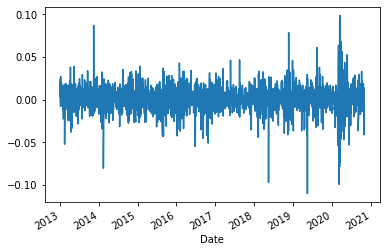

In [39]:
# sanity check
df_pct['A'].plot()

### Creación de listas para filtros

- Se crean dos listas con tuplas que continen los rangos de filtrado del df para la generación de los csv

In [40]:
Lista_Entrenamiento = [('2013-01-01','2014-12-31'),
                       ('2013-04-01','2015-03-31'),
                       ('2013-07-01','2015-06-30'),
                       ('2013-10-01','2015-09-30'),
                       ('2014-01-01','2015-12-31'),
                       ('2014-04-01','2016-03-31'),
                       ('2014-07-01','2016-06-30'),
                       ('2014-10-01','2016-09-30'),
                       ('2015-01-01','2016-12-31'),
                       ('2015-04-01','2017-03-31'),
                       ('2015-07-01','2017-06-30'),
                       ('2015-10-01','2017-09-30'),
                       ('2016-01-01','2017-12-31'),
                       ('2016-04-01','2018-03-31'),
                       ('2016-07-01','2018-06-30'),
                       ('2016-10-01','2018-09-30'),
                       ('2017-01-01','2018-12-31'),
                       ('2017-04-01','2019-03-31'),
                       ('2017-07-01','2019-06-30'),
                       ('2017-10-01','2019-09-30'),
                       ('2018-01-01','2019-12-31'),
                       ('2018-04-01','2020-03-31'),
                       ('2018-07-01','2020-06-30'),
                       ('2018-10-01','2020-09-30'),#('2020-01-01','2020-12-31'),
                      ]

In [41]:
Lista_Test = [('2015-01-01','2015-03-31'),
              ('2015-04-01','2015-06-30'),
              ('2015-07-01','2015-09-30'),
              ('2015-10-01','2015-12-31'),
              ('2016-01-01','2016-03-31'),
              ('2016-04-01','2016-06-30'),
              ('2016-07-01','2016-09-30'),
              ('2016-10-01','2016-12-31'),
              ('2017-01-01','2017-03-31'),
              ('2017-04-01','2017-06-30'),
              ('2017-07-01','2017-09-30'),
              ('2017-10-01','2017-12-31'),
              ('2018-01-01','2018-03-31'),
              ('2018-04-01','2018-06-30'),
              ('2018-07-01','2018-09-30'),
              ('2018-10-01','2018-12-31'),
              ('2019-01-01','2019-03-31'),
              ('2019-04-01','2019-06-30'),
              ('2019-07-01','2019-09-30'),
              ('2019-10-01','2019-12-31'),
              ('2020-01-01','2020-03-31'),
              ('2020-04-01','2020-06-30'),
              ('2020-07-01','2020-09-30'),
              #('2020-10-01','2020-12-31'),
                       ]

In [42]:
df_pct.reset_index(inplace=True)

In [43]:
df_pct.head()

Stock,Date,A,AAL,AAP,AAPL,ABC,ABMD,ABT,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIV,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALL,ALXN,AMAT,AMCR,AMD,AME,AMGN,AMP,AMT,AMZN,ANSS,ANTM,AON,AOS,APA,APD,APH,APTV,ARE,ATO,ATVI,AVB,AVGO,AVY,AWK,AXP,AZO,BA,BAC,BAX,BBY,BDX,BEN,BIIB,BIO,BK,BKNG,BKR,BLK,BLL,BMY,BR,BSX,BWA,BXP,C,CAG,CAH,CAT,CB,CBOE,CBRE,CCI,CCL,CDNS,CE,CERN,CF,CHD,CHRW,CHTR,CI,CINF,CL,CLX,CMA,CMCSA,CME,CMG,CMI,CMS,CNC,CNP,COF,COG,COO,COP,COST,CPB,CPRT,CRM,CSCO,CSX,CTAS,CTSH,CTXS,CVS,CVX,CXO,D,DAL,DD,DE,DFS,DG,DGX,DHI,DHR,DIS,DISCA,DISCK,DISH,DLR,DLTR,DOV,DPZ,DRE,DRI,DTE,DUK,DVA,DVN,DXC,DXCM,EA,EBAY,ECL,ED,EFX,EIX,EL,EMN,EMR,EOG,EQIX,EQR,ES,ESS,ETN,ETR,EVRG,EW,EXC,EXPD,EXPE,EXR,F,FANG,FAST,FB,FBHS,FCX,FDX,FE,FFIV,FIS,FISV,FITB,FLIR,FLS,FLT,FMC,FRC,FRT,FTI,FTNT,GD,GE,GILD,GIS,GL,GLW,GM,GOOG,GOOGL,GPC,GPN,GPS,GRMN,GS,GWW,HAL,HAS,HBAN,HBI,HCA,HD,HES,HFC,HIG,HII,HOLX,HON,HPQ,HRL,HSIC,HST,HSY,HUM,IBM,ICE,IDXX,IEX,IFF,ILMN,INCY,INTC,INTU,IP,IPG,IPGP,IRM,ISRG,IT,ITW,IVZ,J,JBHT,JCI,JKHY,JNJ,JNPR,JPM,K,KEY,KIM,KLAC,KMB,KMI,KMX,KO,KR,KSU,L,LB,LDOS,LEG,LEN,LH,LHX,LIN,LKQ,LLY,LMT,LNC,LNT,LOW,LRCX,LUV,LVS,LYB,LYV,MA,MAA,MAR,MAS,MCD,MCHP,MCK,MCO,MDLZ,MDT,MET,MGM,MHK,MKC,MKTX,MLM,MMC,MMM,MNST,MO,MOS,MPC,MRK,MRO,MS,MSCI,MSFT,MSI,MTB,MTD,MU,MXIM,MYL,NDAQ,NEE,NEM,NFLX,NI,NKE,NLSN,NOC,NOV,NOW,NRG,NSC,NTAP,NTRS,NUE,NVDA,NVR,NWL,O,ODFL,OKE,OMC,ORCL,ORLY,OXY,PAYX,PBCT,PCAR,PEAK,PEG,PEP,PFE,PFG,PG,PGR,PH,PHM,PKG,PKI,PLD,PM,PNC,PNR,PNW,POOL,PPG,PPL,PRGO,PRU,PSA,PSX,PVH,PWR,PXD,QCOM,RCL,RE,REG,REGN,RF,RHI,RJF,RL,RMD,ROK,ROL,ROP,ROST,RSG,RTX,SBAC,SBUX,SCHW,SEE,SHW,SIVB,SJM,SLB,SLG,SNA,SNPS,SO,SPG,SPGI,SRE,STE,STT,STX,STZ,SWK,SWKS,SYK,SYY,T,TAP,TDG,TDY,TEL,TER,TFC,TFX,TGT,TIF,TJX,TMO,TMUS,TPR,TROW,TRV,TSCO,TSN,TT,TTWO,TXN,TXT,TYL,UAA,UAL,UDR,UHS,ULTA,UNH,UNM,UNP,UPS,URI,USB,V,VAR,VFC,VLO,VMC,VNO,VRSK,VRSN,VRTX,VTR,VZ,WAB,WAT,WBA,WDC,WEC,WELL,WFC,WHR,WLTW,WM,WMB,WMT,WRB,WST,WU,WY,WYNN,XEL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION
0,2013-01-02,0.022960,0.035556,0.001935,0.031681,0.007179,0.018601,0.019827,0.038496,0.017516,0.046125,0.046732,0.025646,0.044979,0.019531,0.022727,0.028037,0.017884,0.033428,0.011456,0.022478,0.024531,0.030555,0.035094,0.023423,0.019726,0.024645,0.067314,0.034965,0.000000,0.054167,0.028746,0.034222,0.042312,0.023036,0.025671,0.040244,0.000000,0.032728,0.024417,0.028535,0.021900,0.052241,0.016471,0.018898,0.018508,0.031073,0.003245,0.028121,0.016037,0.023431,0.025663,0.006913,0.022691,0.036176,0.014852,-0.003376,0.016114,0.033970,0.024800,0.022941,0.045914,0.029030,0.031334,0.029316,0.029051,0.014578,0.031032,0.027923,0.040352,0.007939,0.042720,0.020000,0.012385,0.043410,0.024938,0.022743,0.023116,0.040743,0.019853,0.036269,0.044240,0.037931,0.020083,0.018480,-0.000949,0.024397,0.031800,0.018131,0.016931,0.011882,0.032301,0.031049,0.013223,0.012102,0.046331,0.017637,0.008781,0.019221,0.056965,-0.010254,0.028979,0.021038,0.027550,0.029521,0.032542,0.018263,0.035114,0.022301,0.026650,0.030590,0.038860,0.027508,0.020806,0.017378,0.021622,0.030329,0.022271,0.018167,0.025421,-0.026537,0.006693,0.030839,0.028265,0.026310,0.031506,0.028376,0.015385,0.012815,-0.016272,0.023284,0.044317,0.012256,0.007322,0.023814,0.018965,-0.012033,0.008071,0.036204,0.019132,0.002066,0.050784,0.033797,0.018905,0.011456,0.018145,0.019212,0.025423,0.030967,0.023926,0.042725,0.006000,0.018936,0.010911,0.041897,0.015686,0.028651,0.021848,0.002690,0.034134,0.029460,0.012641,0.019305,0.006276,0.025295,0.051841,0.051677,0.028363,0.027584,0.005268,0.040762,0.029015,0.028470,0.037500,0.051075,0.035491,0.028518,0.015380,0.011287,0.012498,0.015643,0.008088,0.028006,0.016675,0.021920,2.226624e-02,0.019992,0.019017,0.010406,0.022435,0.022435,0.024693,0.018322,0.010632,0.034356,0.032142,0.026486,0.029403,-0.002228,0.028169,-0.006421,0.037454,0.026354,0.014162,0.001289,0.056595,0.016613,0.022988,0.020167,0.054035,0.025633,0.024869,0.029993,0.029217,-0.002768,0.025059,0.008965,0.013470,0.030088,0.027202,-0.003058,0.023480,0.036857,0.041526,0.016315,0.055354,0.022356,0.033172,0.014

In [44]:
start, end = Lista_Entrenamiento[0]
start, end

('2013-01-01', '2014-12-31')

In [45]:
df_pct[(df_pct['Date']>=start) & (df_pct['Date']<=end)]

Stock,Date,A,AAL,AAP,AAPL,ABC,ABMD,ABT,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIV,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALL,ALXN,AMAT,AMCR,AMD,AME,AMGN,AMP,AMT,AMZN,ANSS,ANTM,AON,AOS,APA,APD,APH,APTV,ARE,ATO,ATVI,AVB,AVGO,AVY,AWK,AXP,AZO,BA,BAC,BAX,BBY,BDX,BEN,BIIB,BIO,BK,BKNG,BKR,BLK,BLL,BMY,BR,BSX,BWA,BXP,C,CAG,CAH,CAT,CB,CBOE,CBRE,CCI,CCL,CDNS,CE,CERN,CF,CHD,CHRW,CHTR,CI,CINF,CL,CLX,CMA,CMCSA,CME,CMG,CMI,CMS,CNC,CNP,COF,COG,COO,COP,COST,CPB,CPRT,CRM,CSCO,CSX,CTAS,CTSH,CTXS,CVS,CVX,CXO,D,DAL,DD,DE,DFS,DG,DGX,DHI,DHR,DIS,DISCA,DISCK,DISH,DLR,DLTR,DOV,DPZ,DRE,DRI,DTE,DUK,DVA,DVN,DXC,DXCM,EA,EBAY,ECL,ED,EFX,EIX,EL,EMN,EMR,EOG,EQIX,EQR,ES,ESS,ETN,ETR,EVRG,EW,EXC,EXPD,EXPE,EXR,F,FANG,FAST,FB,FBHS,FCX,FDX,FE,FFIV,FIS,FISV,FITB,FLIR,FLS,FLT,FMC,FRC,FRT,FTI,FTNT,GD,GE,GILD,GIS,GL,GLW,GM,GOOG,GOOGL,GPC,GPN,GPS,GRMN,GS,GWW,HAL,HAS,HBAN,HBI,HCA,HD,HES,HFC,HIG,HII,HOLX,HON,HPQ,HRL,HSIC,HST,HSY,HUM,IBM,ICE,IDXX,IEX,IFF,ILMN,INCY,INTC,INTU,IP,IPG,IPGP,IRM,ISRG,IT,ITW,IVZ,J,JBHT,JCI,JKHY,JNJ,JNPR,JPM,K,KEY,KIM,KLAC,KMB,KMI,KMX,KO,KR,KSU,L,LB,LDOS,LEG,LEN,LH,LHX,LIN,LKQ,LLY,LMT,LNC,LNT,LOW,LRCX,LUV,LVS,LYB,LYV,MA,MAA,MAR,MAS,MCD,MCHP,MCK,MCO,MDLZ,MDT,MET,MGM,MHK,MKC,MKTX,MLM,MMC,MMM,MNST,MO,MOS,MPC,MRK,MRO,MS,MSCI,MSFT,MSI,MTB,MTD,MU,MXIM,MYL,NDAQ,NEE,NEM,NFLX,NI,NKE,NLSN,NOC,NOV,NOW,NRG,NSC,NTAP,NTRS,NUE,NVDA,NVR,NWL,O,ODFL,OKE,OMC,ORCL,ORLY,OXY,PAYX,PBCT,PCAR,PEAK,PEG,PEP,PFE,PFG,PG,PGR,PH,PHM,PKG,PKI,PLD,PM,PNC,PNR,PNW,POOL,PPG,PPL,PRGO,PRU,PSA,PSX,PVH,PWR,PXD,QCOM,RCL,RE,REG,REGN,RF,RHI,RJF,RL,RMD,ROK,ROL,ROP,ROST,RSG,RTX,SBAC,SBUX,SCHW,SEE,SHW,SIVB,SJM,SLB,SLG,SNA,SNPS,SO,SPG,SPGI,SRE,STE,STT,STX,STZ,SWK,SWKS,SYK,SYY,T,TAP,TDG,TDY,TEL,TER,TFC,TFX,TGT,TIF,TJX,TMO,TMUS,TPR,TROW,TRV,TSCO,TSN,TT,TTWO,TXN,TXT,TYL,UAA,UAL,UDR,UHS,ULTA,UNH,UNM,UNP,UPS,URI,USB,V,VAR,VFC,VLO,VMC,VNO,VRSK,VRSN,VRTX,VTR,VZ,WAB,WAT,WBA,WDC,WEC,WELL,WFC,WHR,WLTW,WM,WMB,WMT,WRB,WST,WU,WY,WYNN,XEL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION
0,2013-01-02,0.022960,0.035556,0.001935,0.031681,0.007179,0.018601,0.019827,0.038496,0.017516,0.046125,0.046732,0.025646,0.044979,0.019531,0.022727,0.028037,0.017884,0.033428,0.011456,0.022478,0.024531,0.030555,0.035094,0.023423,0.019726,0.024645,0.067314,0.034965,0.000000,0.054167,0.028746,0.034222,0.042312,0.023036,0.025671,0.040244,0.000000,0.032728,0.024417,0.028535,0.021900,0.052241,0.016471,0.018898,0.018508,0.031073,0.003245,0.028121,0.016037,0.023431,0.025663,0.006913,0.022691,0.036176,0.014852,-0.003376,0.016114,0.033970,0.024800,0.022941,0.045914,0.029030,0.031334,0.029316,0.029051,0.014578,0.031032,0.027923,0.040352,0.007939,0.042720,0.020000,0.012385,0.043410,0.024938,0.022743,0.023116,0.040743,0.019853,0.036269,0.044240,0.037931,0.020083,0.018480,-0.000949,0.024397,0.031800,0.018131,0.016931,0.011882,0.032301,0.031049,0.013223,0.012102,0.046331,0.017637,0.008781,0.019221,0.056965,-0.010254,0.028979,0.021038,0.027550,0.029521,0.032542,0.018263,0.035114,0.022301,0.026650,0.030590,0.038860,0.027508,0.020806,0.017378,0.021622,0.030329,0.022271,0.018167,0.025421,-0.026537,0.006693,0.030839,0.028265,0.026310,0.031506,0.028376,0.015385,0.012815,-0.016272,0.023284,0.044317,0.012256,0.007322,0.023814,0.018965,-0.012033,0.008071,0.036204,0.019132,0.002066,0.050784,0.033797,0.018905,0.011456,0.018145,0.019212,0.025423,0.030967,0.023926,0.042725,0.006000,0.018936,0.010911,0.041897,0.015686,0.028651,0.021848,0.002690,0.034134,0.029460,0.012641,0.019305,0.006276,0.025295,0.051841,0.051677,0.028363,0.027584,0.005268,0.040762,0.029015,0.028470,0.037500,0.051075,0.035491,0.028518,0.015380,0.011287,0.012498,0.015643,0.008088,0.028006,0.016675,0.021920,2.226624e-02,0.019992,0.019017,0.010406,0.022435,0.022435,0.024693,0.018322,0.010632,0.034356,0.032142,0.026486,0.029403,-0.002228,0.028169,-0.006421,0.037454,0.026354,0.014162,0.001289,0.056595,0.016613,0.022988,0.020167,0.054035,0.025633,0.024869,0.029993,0.029217,-0.002768,0.025059,0.008965,0.013470,0.030088,0.027202,-0.003058,0.023480,0.036857,0.041526,0.016315,0.055354,0.022356,0.033172,0.014

In [46]:
df_pct.shape

(1973, 466)

### Generación de los archivos para calcular las covarianzas de las optimizaciones

Se crean archivos para ventanas moviles bianuales para el proceso de evaluación de las optimizaciones.

In [47]:
lista = Lista_Entrenamiento
m = len(lista)
path = 'train/'


for i in range(m):
    start, end = lista[i]
    name_file = path + "opt-" + start.replace("-", "")  + "-" + end.replace("-","") +".csv"
    df_aux = df_pct[(df_pct['Date']>=start) & (df_pct['Date']<=end)].copy()
    df_aux.to_csv(name_file, index=False)
    print(name_file,df_aux.shape)

train/opt-20130101-20141231.csv (504, 466)
train/opt-20130401-20150331.csv (505, 466)
train/opt-20130701-20150630.csv (504, 466)
train/opt-20131001-20150930.csv (504, 466)
train/opt-20140101-20151231.csv (504, 466)
train/opt-20140401-20160331.csv (504, 466)
train/opt-20140701-20160630.csv (505, 466)
train/opt-20141001-20160930.csv (505, 466)
train/opt-20150101-20161231.csv (504, 466)
train/opt-20150401-20170331.csv (505, 466)
train/opt-20150701-20170630.csv (505, 466)
train/opt-20151001-20170930.csv (504, 466)
train/opt-20160101-20171231.csv (503, 466)
train/opt-20160401-20180331.csv (503, 466)
train/opt-20160701-20180630.csv (503, 466)
train/opt-20161001-20180930.csv (502, 466)
train/opt-20170101-20181231.csv (502, 466)
train/opt-20170401-20190331.csv (501, 466)
train/opt-20170701-20190630.csv (501, 466)
train/opt-20171001-20190930.csv (502, 466)
train/opt-20180101-20191231.csv (503, 466)
train/opt-20180401-20200331.csv (504, 466)
train/opt-20180701-20200630.csv (503, 466)
train/opt-2

### Generación de archivos de prueba

Son archivos que permiten evaluar la rentabilidad del fondo en un trimestre

In [48]:
lista = Lista_Test
m = len(lista)
path = 'test/'


for i in range(m):
    start, end = lista[i]
    name_file = path + "pereval-" + start.replace("-", "")  + "-" + end.replace("-","") +".csv"
    df_aux = df_pct[(df_pct['Date']>=start) & (df_pct['Date']<=end)].copy()
    df_aux.to_csv(name_file, index=False)
    print(name_file,df_aux.shape)

test/pereval-20150101-20150331.csv (61, 466)
test/pereval-20150401-20150630.csv (63, 466)
test/pereval-20150701-20150930.csv (64, 466)
test/pereval-20151001-20151231.csv (64, 466)
test/pereval-20160101-20160331.csv (61, 466)
test/pereval-20160401-20160630.csv (64, 466)
test/pereval-20160701-20160930.csv (64, 466)
test/pereval-20161001-20161231.csv (63, 466)
test/pereval-20170101-20170331.csv (62, 466)
test/pereval-20170401-20170630.csv (63, 466)
test/pereval-20170701-20170930.csv (63, 466)
test/pereval-20171001-20171231.csv (63, 466)
test/pereval-20180101-20180331.csv (61, 466)
test/pereval-20180401-20180630.csv (64, 466)
test/pereval-20180701-20180930.csv (63, 466)
test/pereval-20181001-20181231.csv (63, 466)
test/pereval-20190101-20190331.csv (61, 466)
test/pereval-20190401-20190630.csv (63, 466)
test/pereval-20190701-20190930.csv (64, 466)
test/pereval-20191001-20191231.csv (64, 466)
test/pereval-20200101-20200331.csv (62, 466)
test/pereval-20200401-20200630.csv (63, 466)
test/perev